In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
df = pd.read_csv("Housing.csv")
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [2]:
xp1_1Columns = df.columns.drop('price').drop('mainroad').drop('guestroom').drop('basement').drop('hotwaterheating').drop('airconditioning').drop('prefarea').drop('furnishingstatus')
x = df[xp1_1Columns].values
y = df['price'].values

display(y)

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

In [3]:
# gradient descent values for problem 1.1
it = 1000
a = 10**(-8)
theta = np.zeros(6)
x0 = np.ones((len(y),1))

x= np.hstack((x0,x))
z = int(0.8 * len(y))
x, Vx = x[:z], x[z:]
y, Vy = y[:z], y[z:]


In [4]:
# LINEAR REGRESSION

def linreg(theta,x,y):
    
    temp = x.dot(theta)
    err = np.float64(np.subtract(temp,y))
    J = np.float64(1/(2*len(y))*np.sum(err*err))
    return J
print(linreg(theta,x,y))

15435824460761.01


In [5]:
# GRADIENT DESCENT

def grad_desc(theta,x,y,a,it,Vx,Vy):
    
    loss_train_array = np.zeros(it)
    loss_validation_array = np.zeros(it)
    
    for b in range(it):
        pred = x.dot(theta)
        difference = np.subtract(pred,y)
        sumd = (a/len(y)) * x.transpose().dot(difference)
        theta = theta - sumd
        loss_train_array[b] = linreg(theta,x,y)
        loss_validation_array[b] = linreg(theta,Vx,Vy)
    
    return theta, loss_train_array, loss_validation_array
theta, p1_1t, p1_1v = grad_desc(theta,x,y,a,it,Vx,Vy)


[  4.62517886 880.07829411  16.66791764   9.30939615  14.43946955
   3.23610557]


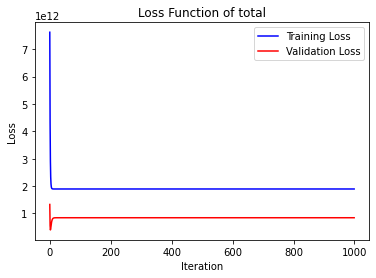

In [6]:
print(theta)
plt.plot(range(1000),p1_1t, color ='blue',label='Training Loss')
plt.plot(range(1000),p1_1v, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [7]:
#Problem 1-b
xnum = ['area','bedrooms','bathrooms','stories','parking']
xbin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
y = df['price'].values
def map_bin(x):
    return x.map({'yes':1,'no':0})
xbin = df[xbin].apply(map_bin)


In [8]:
xtot=pd.concat((df[xnum],xbin),axis=1)
print(xtot)

     area  bedrooms  bathrooms  stories  parking  mainroad  guestroom  \
0    7420         4          2        3        2         1          0   
1    8960         4          4        4        3         1          0   
2    9960         3          2        2        2         1          0   
3    7500         4          2        2        3         1          0   
4    7420         4          1        2        2         1          1   
..    ...       ...        ...      ...      ...       ...        ...   
540  3000         2          1        1        2         1          0   
541  2400         3          1        1        0         0          0   
542  3620         2          1        1        0         1          0   
543  2910         3          1        1        0         0          0   
544  3850         3          1        2        0         1          0   

     basement  hotwaterheating  airconditioning  prefarea  
0           0                0                1         1  
1  

In [9]:
it = 1000
a = 10**(-8)
theta = np.zeros(12)
x0 = np.ones((len(y),1))

x= np.hstack((x0,xtot))
z = int(0.8 * len(y))
x, Vx = x[:z], x[z:]
y, Vy = y[:z], y[z:]

[4.62517504e+00 8.80077166e+02 1.66679061e+01 9.30939105e+00
 1.44394617e+01 3.23610411e+00 4.04030351e+00 1.59044380e+00
 2.68311829e+00 6.72566271e-01 3.52758029e+00 1.62265350e+00]


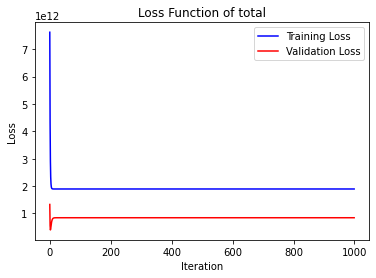

In [10]:
theta, p1_2t, p1_2v = grad_desc(theta,x,y,a,it,Vx,Vy)
print(theta)
plt.plot(range(1000),p1_2t, color ='blue',label='Training Loss')
plt.plot(range(1000),p1_2v, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [11]:
#problem 2a + 2b

x = df[xp1_1Columns].values
y = df['price'].values
x0 = np.ones((len(y),1))

x_stand = np.float64(x)
y_stand = np.float64(y)

x_norm = np.float64(x)
y_norm = np.float64(y)






def min_max(z,y):
    i = 0
    j = 0
    m = 0
    num_rows, num_columns = z.shape
    
    while i < num_columns:
        while j < num_rows:
            temp = z[j, i]   
            z[j,i] = ((temp - np.amin(z[:,i]))/(np.amax(z[:,i])-np.amin(z[:,i])))
            j=j+1
        i=i+1
    while m < len(y):
        y[m] =((y[m] - np.amin(y))/(np.amax(y)-np.amin(y)))
        m+=1
min_max(x_norm,y_norm)





def z_score(z,y):
    i=0
    j=0
    m=0
    num_rows, num_columns = z.shape
    
    while i < num_columns:
        print('column:  ',i)
        print('mean:  ',st.mean(z[:,i]))
        print('sdev:  ',st.stdev(z[:,i]))
        while j < num_rows:
            z[j,i] = np.float64(((z[j,i]) - st.mean(z[:,i]))/(st.stdev(z[:,i])))
            j+=1
        i+=1
    while m < len(y):
        y[m]=((y[m] - st.mean(y))/(st.stdev(y)))
        m+=1
z_score(x_stand,y_stand)

x_norm = np.hstack((x0,x_norm))
x_stand = np.hstack((x0,x_stand))

z = int(0.8 * len(y))

x_norm, Vx_norm = x_norm[:z], x_norm[z:]
y_norm, Vy_norm = y_norm[:z], y_norm[z:]

x_stand, Vx_stand = x_stand[:z], x_stand[z:]
y_stand, Vy_stand = y_stand[:z], y_stand[z:]





column:   0
mean:   5150.54128440367
sdev:   2170.141022508803
column:   1
mean:   2.9651376146788992
sdev:   0.7380638605685743
column:   2
mean:   1.2862385321100918
sdev:   0.5024696160532146
column:   3
mean:   1.8055045871559634
sdev:   0.8674924629255264
column:   4
mean:   0.6935779816513762
sdev:   0.8615857504605413


[0.39233012 0.13442126 0.14164388 0.04894409 0.01280022 0.00564986]


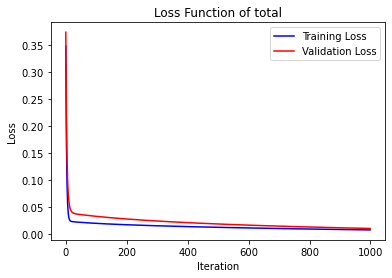

In [12]:
#problem 2a NORMALIZATION
theta = np.zeros(6)
a = 10**(-2)
theta, p2_1nt, p2_1nv = grad_desc(theta,x_norm,y_norm,a,it,Vx_norm,Vy_norm)
print(theta)
plt.plot(range(1000),p2_1nt, color ='blue',label='Training Loss')
plt.plot(range(1000),p2_1nv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

[0.14072167 0.16505204 0.27742273 0.15556084 0.14238508 0.08419791]


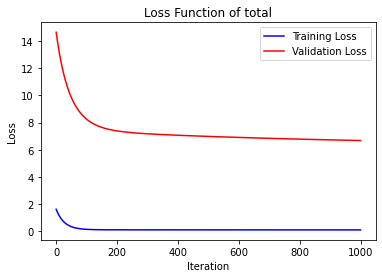

In [13]:
#problem 2a STANDARDIZATION
theta = np.zeros(6)
a = 10**(-3)
theta, p2_1st, p2_1sv = grad_desc(theta,x_stand,y_stand,a,it,Vx_stand,Vy_stand)
print(theta)
plt.plot(range(1000),p2_1st, color ='blue',label='Training Loss')
plt.plot(range(1000),p2_1sv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [14]:
#problem 2b
xnum = ['area','bedrooms','bathrooms','stories','parking']
xbin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
y = df['price'].values
xbin = df[xbin].apply(map_bin)
print(df[xnum])
xtot=pd.concat((df[xnum],xbin),axis=1)

x_norm = np.float64(xtot)
y_norm = np.float64(y)
min_max(x_norm,y_norm)

x_stand = np.float64(xtot)
y_stand = np.float64(y)
z_score(x_stand,y_stand)

x_norm = np.hstack((x0,x_norm))
x_stand = np.hstack((x0,x_stand))

z = int(0.8 * len(y))

x_norm, Vx_norm = x_norm[:z], x_norm[z:]
y_norm, Vy_norm = y_norm[:z], y_norm[z:]

x_stand, Vx_stand = x_stand[:z], x_stand[z:]
y_stand, Vy_stand = y_stand[:z], y_stand[z:]




     area  bedrooms  bathrooms  stories  parking
0    7420         4          2        3        2
1    8960         4          4        4        3
2    9960         3          2        2        2
3    7500         4          2        2        3
4    7420         4          1        2        2
..    ...       ...        ...      ...      ...
540  3000         2          1        1        2
541  2400         3          1        1        0
542  3620         2          1        1        0
543  2910         3          1        1        0
544  3850         3          1        2        0

[545 rows x 5 columns]
column:   0
mean:   5150.54128440367
sdev:   2170.141022508803
column:   1
mean:   2.9651376146788992
sdev:   0.7380638605685743
column:   2
mean:   1.2862385321100918
sdev:   0.5024696160532146
column:   3
mean:   1.8055045871559634
sdev:   0.8674924629255264
column:   4
mean:   0.6935779816513762
sdev:   0.8615857504605413
column:   5
mean:   0.8587155963302753
sdev:   0.348634681855

[0.12747951 0.04776563 0.16892096 0.06344739 0.04363081 0.0177524
 0.10387182 0.00761702 0.04119458 0.0032346  0.00507881 0.01958729]


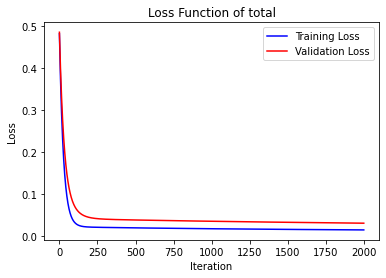

In [15]:
#problem 2b NORMALIZATION
theta = np.zeros(12)
a = 10**(-3)
it = 2000
theta, p2_2nt, p2_2nv = grad_desc(theta,x_norm,y_norm,a,it,Vx_norm,Vy_norm)
print(theta)
plt.plot(range(it),p2_2nt, color ='blue',label='Training Loss')
plt.plot(range(it),p2_2nv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

[ 0.16630779  0.17116622  0.23456605  0.16449493  0.11169471  0.07071187
  0.12711299 -0.00274724  0.05166138  0.01566839  0.04011875  0.04541628]


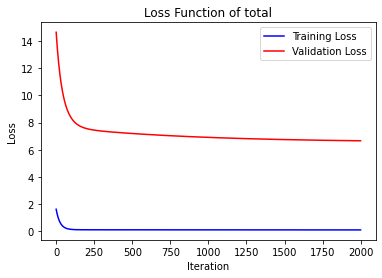

In [16]:
#problem 2b STANDARDIZATION
theta = np.zeros(12)
a = 10**(-3)
it = 2000
theta, p2_2st, p2_2sv = grad_desc(theta,x_stand,y_stand,a,it,Vx_stand,Vy_stand)
print(theta)
plt.plot(range(it),p2_2st, color ='blue',label='Training Loss')
plt.plot(range(it),p2_2sv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [17]:
#problem 3a + 3b
def linreg_PP(theta,x,y):
    lamb = 0.0001
    temp = x.dot(theta)
    err = np.float64(np.subtract(temp,y))
    J = np.float64(1/(2*len(y))*(np.sum(err*err)+lamb*np.sum(theta**2)))
    return J
def grad_desc_PP(theta,x,y,a,it,Vx,Vy):
    
    loss_train_array = np.zeros(it)
    loss_validation_array = np.zeros(it)
    lamb = 0.0001
    for b in range(it):
        pred = x.dot(theta)
        difference = np.subtract(pred,y)
        sumd = ((a/len(y)) * (x.transpose().dot(difference)+ ((lamb/len(y))*np.sum(theta**2))))
        theta = theta - sumd
        loss_train_array[b] = linreg_PP(theta,x,y)
        loss_validation_array[b] = linreg_PP(theta,Vx,Vy)
    
    return theta, loss_train_array, loss_validation_array

In [18]:
#problem 3a p1
x = df[xp1_1Columns].values
y = df['price'].values
x0 = np.ones((len(y),1))


x_norm = np.float64(x)
y_norm = np.float64(y)
min_max(x_norm,y_norm)

x_norm = np.hstack((x0,x_norm))

z = int(0.8 * len(y))

x_norm, Vx_norm = x_norm[:z], x_norm[z:]
y_norm, Vy_norm = y_norm[:z], y_norm[z:]



[0.10047946 0.0394879  0.1872956  0.07584505 0.07243224 0.03447497]


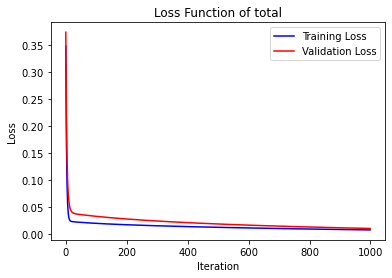

In [19]:
#problem 3a NORMALIZATION 
theta = np.zeros(6)
a = 10**(-3)
it = 1000
theta, p3_1nt, p3_1nv = grad_desc_PP(theta,x_norm,y_norm,a,it,Vx_norm,Vy_norm)
print(theta)
plt.plot(range(it),p2_1nt, color ='blue',label='Training Loss')
plt.plot(range(it),p2_1nv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [20]:
#problem 3a p2
x = df[xp1_1Columns].values
y = df['price'].values
x0 = np.ones((len(y),1))

x_stand = np.float64(x)
y_stand = np.float64(y)
z_score(x_stand,y_stand)

x_stand = np.hstack((x0,x_stand))

z = int(0.8 * len(y))

x_norm, Vx_norm = x_norm[:z], x_norm[z:]
y_norm, Vy_norm = y_norm[:z], y_norm[z:]

x_stand, Vx_stand = x_stand[:z], x_stand[z:]
y_stand, Vy_stand = y_stand[:z], y_stand[z:]


column:   0
mean:   5150.54128440367
sdev:   2170.141022508803
column:   1
mean:   2.9651376146788992
sdev:   0.7380638605685743
column:   2
mean:   1.2862385321100918
sdev:   0.5024696160532146
column:   3
mean:   1.8055045871559634
sdev:   0.8674924629255264
column:   4
mean:   0.6935779816513762
sdev:   0.8615857504605413


[0.18439352 0.18170444 0.26138544 0.17766734 0.12150808 0.08176152]


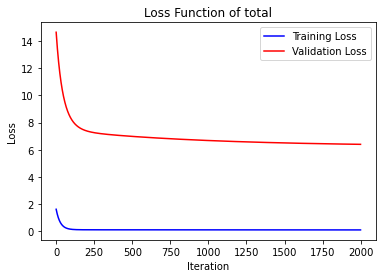

In [21]:
#problem 3a STANDARDIZATION
theta = np.zeros(6)
a = 10**(-3)
it = 2000
theta, p3_1st, p3_1sv = grad_desc_PP(theta,x_stand,y_stand,a,it,Vx_stand,Vy_stand)
print(theta)
plt.plot(range(it),p3_1st, color ='blue',label='Training Loss')
plt.plot(range(it),p3_1sv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

In [22]:
#problem 3b p1
xnum = ['area','bedrooms','bathrooms','stories','parking']
xbin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
y = df['price'].values
xbin = df[xbin].apply(map_bin)
xtot=pd.concat((df[xnum],xbin),axis=1)

x_norm = np.float64(xtot)
y_norm = np.float64(y)
min_max(x_norm,y_norm)

x_stand = np.float64(xtot)
y_stand = np.float64(y)
z_score(x_stand,y_stand)

x_norm = np.hstack((x0,x_norm))
x_stand = np.hstack((x0,x_stand))

z = int(0.8 * len(y))

x_norm, Vx_norm = x_norm[:z], x_norm[z:]
y_norm, Vy_norm = y_norm[:z], y_norm[z:]

x_stand, Vx_stand = x_stand[:z], x_stand[z:]
y_stand, Vy_stand = y_stand[:z], y_stand[z:]


column:   0
mean:   5150.54128440367
sdev:   2170.141022508803
column:   1
mean:   2.9651376146788992
sdev:   0.7380638605685743
column:   2
mean:   1.2862385321100918
sdev:   0.5024696160532146
column:   3
mean:   1.8055045871559634
sdev:   0.8674924629255264
column:   4
mean:   0.6935779816513762
sdev:   0.8615857504605413
column:   5
mean:   0.8587155963302753
sdev:   0.3486346818552864
column:   6
mean:   0.1779816513761468
sdev:   0.3828486968277535
column:   7
mean:   0.3504587155963303
sdev:   0.47755193997058665
column:   8
mean:   0.045871559633027525
sdev:   0.2093986971189168
column:   9
mean:   0.3155963302752294
sdev:   0.4651798971916287
column:   10
mean:   0.23486238532110093
sdev:   0.42430222710285986


[0.12747951 0.04776563 0.16892096 0.06344739 0.04363081 0.0177524
 0.10387182 0.00761702 0.04119458 0.0032346  0.00507881 0.01958729]


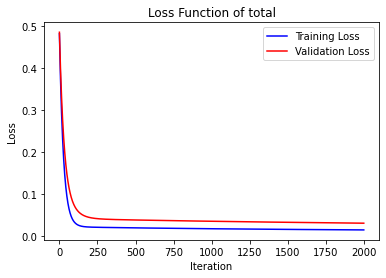

In [23]:
#problem 3b NORMALIZATION
theta = np.zeros(12)
a = 10**(-3)
it = 2000
theta, p3_2nt, p3_2nv = grad_desc_PP(theta,x_norm,y_norm,a,it,Vx_norm,Vy_norm)
print(theta)
plt.plot(range(it),p3_2nt, color ='blue',label='Training Loss')
plt.plot(range(it),p3_2nv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()


[ 0.16630779  0.17116622  0.23456605  0.16449493  0.11169471  0.07071187
  0.12711299 -0.00274724  0.05166138  0.01566839  0.04011875  0.04541628]


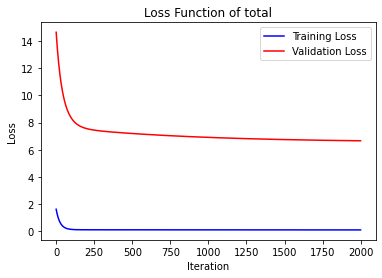

In [24]:
#problem 3b STANDARDIZATION
theta = np.zeros(12)
a = 10**(-3)
it = 2000
theta, p3_2st, p3_2sv = grad_desc_PP(theta,x_stand,y_stand,a,it,Vx_stand,Vy_stand)
print(theta)
plt.plot(range(it),p3_2st, color ='blue',label='Training Loss')
plt.plot(range(it),p3_2sv, color ='red', label='Validation Loss')
plt.title('Loss Function of total')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()